In [1]:
from pointnet2.models import Pointnet_Tracking3
from thop import profile 
# from torchstat import stat 
import torch 
model = Pointnet_Tracking3(input_channels=0, use_xyz=True).cuda()
a = torch.randn((1, 256, 3)).cuda()
b = torch.randn((1, 512, 3)).cuda()
macs, params = profile(model, inputs=(a, b))
macs, params

[WARN] Cannot find rule for <class 'pointnet2.utils.pointnet2_utils.QueryAndGroup'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.container.ModuleList'>. Treat it as zero Macs and zero Params.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_bn() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[WARN] Cannot find rule for <class 'etw_pytorch_utils.pytorch_utils.BatchNorm2d'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[WARN] Cannot find rule for <class 'etw_pytorch_utils.pytorch_utils.Conv2d'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'etw_pytorch_utils.pytorch_utils.SharedMLP'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'pointnet2.utils.pointnet2_modules.PointnetSAModule'>. Treat it as zero Macs and zero Params.
[INFO] Register count_convNd() for <class

(1914856000.0, 1637449.0)

In [1]:
import logging # 引入logging模块
import os
import os.path
import time
# 第一步，创建一个logger
logger = logging.getLogger()
logger.setLevel(logging.INFO) # Log等级总开关
# 第二步，创建一个handler，用于写入日志文件
rq = time.strftime('%Y%m%d%H%M', time.localtime(time.time()))
# log_path = os.path.dirname(os.getcwd()) + '/Logs/'
log_path = os.getcwd() + '/Logs/'
# print(log_path)
log_name = log_path + rq + '.log'
logfile = log_name
# os.makedirs(log_path)
fh = logging.FileHandler(logfile)
fh.setLevel(logging.DEBUG) # 输出到file的log等级的开关
# 第三步，定义handler的输出格式
formatter = logging.Formatter("%(asctime)s - %(filename)s[line:%(lineno)d] - %(levelname)s: %(message)s")
fh.setFormatter(formatter)
# 第四步，将logger添加到handler里面
logger.addHandler(fh)
# 日志
logger.debug('this is a logger debug message')
logger.info('this is a logger info message')
logger.warning('this is a logger warning message')
logger.error('this is a logger error message')
logger.critical('this is a logger critical message')

In [1]:
import torch
from torch import nn
class A(nn.Module):
    def __init__(self, c):
        super(A, self).__init__()
        self.c = c
        print('haha')
        print(self.c)
    
    def forward(self,):
        print('lala')
        return self.c + 1

class B(A):

    def __init__(self, e):
        super(B, self).__init__(c=e)
        self.c += 1
        print('yoyo')
    
    # def forward(self):
    #     print('yoyo2')

class C(nn.Module):
    def __init__(self):
        super(C, self).__init__()
        self.backbone = A()
        print('sasa')

    def forward(self):
        print('gaga')
        return self.backbone(1)

b = B(2)
b()

haha
2
yoyo
lala


4

In [1]:
import etw_pytorch_utils as pt_utils
import torch
import torch.nn as nn
from pointnet2.utils.pointnet2_modules import PointnetSAModule, PointnetFPModule
# A = (
#                 pt_utils.Seq(256)
#                 .conv1d(1, bn=True, activation=None))
A = nn.ModuleList()
A.append(PointnetFPModule(
                mlp=[512, 256] 
            ))
A.append(PointnetFPModule(
                mlp=[384, 256] 
            ))
A.append(PointnetFPModule(
                mlp=[256, 256] 
            ))
A
# A = nn.Linear(256, 3)
# a = torch.ones((3, 256, 1024))
# # b = A(a).squeeze(1)
# b = b.sigmoid()
# b.shape
# unxyz = torch.rand((8, 1024, 3), dtype=torch.float32).cuda()
# xyz1 = torch.rand((1, 2, 3), dtype=torch.float32).cuda()
# xyz2 = torch.rand((8, 256, 3), dtype=torch.float32).cuda()
# xyz3 = torch.rand((8, 512, 3), dtype=torch.float32).cuda()
# feats1 = torch.rand((8, 256, 128), dtype=torch.float32).cuda()
# feats2 = torch.rand((8, 256, 256), dtype=torch.float32).cuda()
# feats3 = torch.rand((8, 128, 512), dtype=torch.float32).cuda()
# aux_module = PointnetFPModule2()
# inter_feats1 = aux_module(unxyz, xyz3, feats3)
# inter_feats1.shape
# xyz = [0.33 * xyz1+0.33 * xyz1+0.33 * xyz1]
# xyz[0], xyz1
# xyzt = torch.cat(xyz, dim=1)
# xyzt.shape

ModuleList(
  (0): PointnetFPModule(
    (mlp): SharedMLP(
      (layer0): Conv2d(
        (conv): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (normlayer): BatchNorm2d(
          (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (activation): ReLU(inplace=True)
      )
    )
  )
  (1): PointnetFPModule(
    (mlp): SharedMLP(
      (layer0): Conv2d(
        (conv): Conv2d(384, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (normlayer): BatchNorm2d(
          (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (activation): ReLU(inplace=True)
      )
    )
  )
  (2): PointnetFPModule(
    (mlp): SharedMLP(
      (layer0): Conv2d(
        (conv): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (normlayer): BatchNorm2d(
          (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [5]:
from cupy.core.dlpack import toDlpack
from cupy.core.dlpack import fromDlpack
from torch.utils.dlpack import to_dlpack
from torch.utils.dlpack import from_dlpack
import torch
from visualize import Visualizer
vis = Visualizer('SA-P2B', port = 8097)

#pytorch->cupy
for i in range(10):
    xyz1 = torch.rand((1), dtype=torch.float32).cuda()
    cupy_data = fromDlpack(to_dlpack(xyz1))
    # type(cupy_data)
    vis.plot('sds', cupy_data.item())
# #cupy->pytorch
# tensor_data = from_dlpack(toDlpack(cupy_data))


Setting up a new session...
Without the incoming socket you cannot receive events from the server or register event handlers to your Visdom client.


In [6]:
import open3d as o3d
import numpy as np 
# a = np.load('E:\RUNNING\data\\train_data.list_of_BBs.npy', allow_pickle=True)
# c = np.load('E:\RUNNING\data\\train_data.list_of_PCs.npy', allow_pickle=True)
# # len(a)
# d = c[12].points.transpose(1, 0)
# b = a[12].corners().transpose(1, 0)
# type(b)
d = np.array(data[0][0])
lines = [
    [0, 4], 
    [4, 0], 
    [0, 1], 
    [1, 5], 
    [5, 1], 
    [1, 2], 
    [2, 6], 
    [6, 2], 
    [2, 3], 
    [3, 7], 
    [7, 3], 
    [3, 0], 
    [0, 4], 
    [4, 5], 
    [5, 6], 
    [6, 7], 
    [7, 4]
]
colors = [[1, 0, 0] for i in range(len(lines))]
# line_set = o3d.geometry.LineSet(
#     points = o3d.utility.Vector3dVector(b),
#     lines = o3d.utility.Vector2iVector(lines)
# )
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(d)

# line_set.colors = o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_geometries([pcd])
# o3d.visualization.draw_geometries([pcd] + [line_set])

In [5]:
import numpy as np
list_of_BBs = np.array(valid_data.list_of_PCs)
np.save('valid_data.list_of_PCs.npy', list_of_BBs)

In [6]:
import numpy as np 
c = np.load('/media/zhouxiaoyu/本地磁盘/RUNNING/P2B/valid_data.list_of_PCs.npy', allow_pickle=True).tolist()
len(c) == len(valid_data.list_of_PCs)

True

In [31]:
# for idx, d in enumerate(data):
    # print(data[idx].shape)
# from train_tracking import aux_loss
import torch 
from mmdet.core.loss.losses import weighted_smoothl1, weighted_sigmoid_focal_loss
label_point_set, label_cla, label_reg, object_point_set, sample_seg_label, sample_seg_offset = data
rpn_cls_target = sample_seg_label.float()
pos = (sample_seg_label > 0).float()
neg = (sample_seg_label == 0).float()
# pos.shape, neg.shape
pos_normalizer = pos.sum()

pos_normalizer = torch.clamp(pos_normalizer, min=1.0)
# pos_normalizer
cls_weights = pos + neg
cls_weights = cls_weights / pos_normalizer
# cls_weights
reg_weights = pos
reg_weights = reg_weights / pos_normalizer
# rpn_cls_target.view(-1).shape
point_cls = torch.randn((8, 1024))
point_reg = torch.randn((8, 3, 1024))
# aux_loss_cls = weighted_sigmoid_focal_loss(point_cls, rpn_cls_target, weight=cls_weights, avg_factor=1.)
# aux_loss_cls

# aux_loss_reg = weighted_smoothl1(point_reg.transpose(1, 2), sample_seg_offset, beta=1 / 9., weight=reg_weights[..., None], avg_factor=1.)
# aux_loss_reg


8

In [11]:
import torch as t 
a = t.randn(2, 3, 2, 2)
# mean = a.mean([3])
b = a[None, ..., None, None]
c = a[..., None, None, None]
a.shape, b.shape, c.shape
# a, mean 

(torch.Size([2, 3, 2, 2]),
 torch.Size([1, 2, 3, 2, 2, 1, 1]),
 torch.Size([2, 3, 2, 2, 1, 1, 1]))

In [4]:
import torch
import torch.nn as nn
import torch.nn.parallel  # 多GPU情况下分布式训练
# import torch.backends.cudnn as cudnn  # 貌似没有用到
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler  # 可用来调整学习率
cc = torch.nn.Conv2d(10, 10, 3)
optimizer = optim.Adam(cc.parameters(), lr=0.001, betas=(0.5, 0.999), eps=1e-06)
scheduler = lr_scheduler.StepLR(optimizer, step_size=12, gamma=0.2)
scheduler.last_epoch

0

In [14]:
import open3d as o3d
import numpy as np 
a = np.load('E:\RUNNING\data\\train_data.model_PC.npy', allow_pickle=True)
# len(a)
d = a[17].points.transpose(1, 0)
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(d)
o3d.visualization.draw_geometries([pcd])

In [5]:
from shapely.geometry import Polygon
j = 1
a = tuple(gtboxs[j].corners()[[0, 2]].T[[0, 4, 7, 3]])

c = tuple(acboxs[j].corners()[[0, 2]].T[[0, 4, 7, 3]])
b = Polygon(tuple(acboxs[j].corners()[[0, 2]].T[[0, 1, 5, 4]])).buffer(0.001)
a, c

((array([2.038447 , 0.7437765]),
  array([-2.038447 ,  0.7437765]),
  array([-2.038447 , -0.7437765]),
  array([ 2.038447 , -0.7437765])),
 (array([2.47254482, 0.7437765 ]),
  array([-1.60434904,  0.7437765 ]),
  array([-1.60434904, -0.7437765 ]),
  array([ 2.47254482, -0.7437765 ])))

In [14]:
from metrics import estimateOverlap, estimateAccuracy
for j in range(66):
    this_overlap1 = estimateOverlap(gtboxs[j], closeboxs[j], dim=3)
    # this_overlap3 = estimateOverlap(closeboxs[j], acboxs[j], dim=3)
    this_accuracy1 = estimateAccuracy(gtboxs[j], closeboxs[j], dim=3)
    this_overlap2 = estimateOverlap(gtboxs[j], acboxs[j], dim=3)
    this_accuracy2 = estimateAccuracy(gtboxs[j], acboxs[j], dim=3)
    print(this_overlap1, this_accuracy1, this_overlap2, this_accuracy2)


0.5525304249967168 0.5414682456676708 0.504821257483547 0.5531459064523769
0.5912296548315348 0.39826005945317633 0.5095171805545771 0.48638718015940846
0.5735066618300428 0.31552013270716134 0.48966010002649285 0.5015080984880279
0.555149944890334 0.39389033828831943 0.49394752952564674 0.6346877946683954
0.6416888351083087 0.1665701273866241 0.5256452466035153 0.5652423283121076
0.6525042962408082 0.22080153976678557 0.6252776222832208 0.41134737372606855
0.5812448217875873 0.3812601666405579 0.5158575842194898 0.6447580425622406
0.4794215533572365 0.5397166685354956 0.38240059099115503 0.792239392117351
0.6888837451046087 0.12351629337433262 0.4775467671960082 0.975579371907527
0.5061468197691817 0.6347235617813386 0.4872995453227315 0.6637021526591459
0.6932065034718323 0.17438409431763108 0.559187890047306 0.7032054498582749
0.26814848298468286 0.7710933722709852 0.37282859034131427 0.9758116690269659
0.3991030630011767 0.5363602800705769 0.41277006280494266 1.014525290024737
0.51

In [1]:
import time
import os
import logging
import argparse
import random
import copy
import numpy as np
from tqdm import tqdm
from pyquaternion import Quaternion
import torch
from metrics import estimateOverlap, estimateAccuracy
import kitty_utils as utils
from Dataset import SiameseTest, SiameseTrain
from pointnet2.models import Pointnet_Tracking, Pointnet_Tracking3 

def test(loader,
        model,
        epoch=-1,
        shape_aggregation=" ",
        reference_BB=" ",
        max_iter=-1,
        IoU_Space=3):
    # switch to evaluate mode
    model.eval()

    dataset = loader.dataset
    batch_num = 0

    with tqdm(enumerate(loader), total=len(loader.dataset.list_of_anno), position=0, desc='testing data') as t:
        for batch in loader:          
            batch_num = batch_num + 1
            for PCs, BBs, _ in batch:
                results_BBs = []  # 保存预测边界框列表
                candidate_PCs_torchs = []
                model_PC_torchs = []
                # acboxs = []
                # gtboxs = []
                # closeboxs = []
                if batch_num == 5:
                    segs = []
                    cens = []
                    # cs = []
                for i, _ in enumerate(PCs):
                    # this_anno = list_of_anno[i]
                    pboxes = []
                    this_BB = BBs[i]  # 当前帧真值边界框
                    this_PC = PCs[i]  # 当前帧点云
                    # INITIAL FRAME
                    if i == 0:
                        box = BBs[i]
                        results_BBs.append(box)
                        model_PC = utils.getModel([this_PC], [this_BB], offset=dataset.offset_BB, scale=dataset.scale_BB)

                    else:
                        previous_BB = BBs[i - 1]  # 前一帧真值边界框

                        # DEFINE REFERENCE BB
                        if ("previous_result".upper() in reference_BB.upper()):
                            ref_BB = results_BBs[-1]  # 参考框选为前一帧预测边界框
                        elif ("previous_gt".upper() in reference_BB.upper()):
                            ref_BB = previous_BB  # 参考框选为前一帧真值边界框
                            # ref_BB = utils.getOffsetBB(this_BB,np.array([-1,1,1]))
                        elif ("current_gt".upper() in reference_BB.upper()):
                            ref_BB = this_BB  # 参考框选为当前帧真值边界框

                        candidate_PC = utils.cropAndCenterPC_label_test_time(
                                        this_PC,
                                        ref_BB,
                                        offset=dataset.offset_BB,
                                        scale=dataset.scale_BB)                        

                        candidate_PCs = utils.regularizePC_test(
                                        candidate_PC,
                                        dataset.input_size,
                                        istrain=False)
                        
                        candidate_PCs_torch = candidate_PCs.unsqueeze(0).cuda()

                        # AGGREGATION: IO vs ONLY0 vs ONLYI vs ALL
                        if ("firstandprevious".upper() in shape_aggregation.upper()):
                            model_PC = utils.getModel([PCs[0], PCs[i-1]], [results_BBs[0],results_BBs[i-1]], offset=dataset.offset_BB, scale=dataset.scale_BB)
                        elif ("first".upper() in shape_aggregation.upper()):
                            model_PC = utils.getModel([PCs[0]], [results_BBs[0]], offset=dataset.offset_BB, scale=dataset.scale_BB)
                        elif ("previous".upper() in shape_aggregation.upper()):
                            model_PC = utils.getModel([PCs[i-1]], [results_BBs[i-1]], offset=dataset.offset_BB, scale=dataset.scale_BB)
                        elif ("all".upper() in shape_aggregation.upper()):
                            model_PC = utils.getModel(PCs[:i], results_BBs, offset=dataset.offset_BB, scale=dataset.scale_BB)
                        else:
                            model_PC = utils.getModel(PCs[:i], results_BBs, offset=dataset.offset_BB, scale=dataset.scale_BB)

                        model_PC_torch = utils.regularizePC(model_PC, dataset.input_size, istrain=False).unsqueeze(0).cuda()
                        model_PC_torch = model_PC_torch.requires_grad_(False)
                        candidate_PCs_torch.requires_grad_(False)
                        candidate_PCs_torchs.append(candidate_PCs_torch)
                        model_PC_torchs.append(model_PC_torch)
                        # _, _, estimation_box, center_xyzs, = model(model_PC_torch, candidate_PCs_torch)
                        _, _, estimation_box, center_xyzs, estimation_seg, estimation_offset = model(model_PC_torch, candidate_PCs_torch)    
                        candidate_PCs_cpu = candidate_PCs_torch.detach().cpu().numpy()                 
                        estimation_box_cpu = estimation_box.squeeze(0).detach().cpu().numpy()
                        # estimation_seg_cpu = estimation_seg.detach().cpu().numpy()
                        estimation_offset_cpu = estimation_offset.detach().cpu().numpy()
                        # estimation_pboxs = estimation_box_cpu[:, 0: 4]
                        # rot = Quaternion(matrix=this_BB.rotation_matrix)
                        # trans = np.array(this_BB.center)
                        rot = Quaternion(matrix=ref_BB.rotation_matrix)
                        trans = np.array(ref_BB.center)                        
                        # for i in range(len(estimation_pboxs)):
                        #     pbox = utils.getOffsetBB2(ref_BB, estimation_pboxs[i])
                        #     # pbox.translate(-trans)
                        #     # pbox.rotate(rot.inverse)                            
                        #     pboxes.append(pbox)
                        # pboxes = [utils.getOffsetBB2(ref_BB, epbox) for idx, epbox in enumerate(estimation_pboxs)]
                        box_idx = estimation_box_cpu[:, 4].argmax()  # 根据proposal-wise targetness得分确定对应的边界框索引
                        estimation_box_final = estimation_box_cpu[box_idx, 0: 4]
                        
                        box = utils.getOffsetBB(ref_BB, estimation_box_final)
                        # gtbox = copy.deepcopy(this_BB)
                        # gtbox.translate(-trans)
                        # gtbox.rotate(rot.inverse)
                        # dist = torch.sum((center_xyzs) ** 2, dim=-1)
                        # dist = torch.sqrt(dist + 1e-6)
                        # d_idx = dist.argmin()
                        # closest = estimation_box_cpu[d_idx, 0: 4]
                        # acbox = utils.getOffsetBB2(ref_BB, estimation_box_final)
                        # closebox = utils.getOffsetBB2(ref_BB, closest)
                        results_BBs.append(box)
                        # estimation_boxs.append(estimation_box_cpu)
                        # acboxs.append(acbox)
                        # gtboxs.append(gtbox)
                        # closeboxs.append(closebox)
                        if (batch_num == 5) and (i < 25):
                            # cs.append(candidate_seg)
                            segs.append(estimation_seg)
                            cens.append(- estimation_offset_cpu + candidate_PCs_cpu)
                    this_overlap = estimateOverlap(BBs[i], results_BBs[-1], dim=IoU_Space)
                    this_accuracy = estimateAccuracy(BBs[i], results_BBs[-1], dim=IoU_Space)
                    # print('\n')
                    # print(this_overlap, this_accuracy, i)
                    t.update(1)  # 推动进度条
                if batch_num == 5:
                    # print(dist)
                    # print(dist.argmin())
                    # return candidate_PCs_torchs, model_PC_torchs, gtboxs, acboxs, closeboxs
                    # return candidate_PCs_torchs, BBs, results_BBs
                    # return PCs, BBs
                    return candidate_PCs_torchs, model_PC_torchs, segs, cens
                    # return candidate_PCs_torchs, model_PC_torchs
            # else:
            #     t.update(1)  # 推动进度条
            #     continue

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '1, 0'

# args.manualSeed = 0
# random.seed(args.manualSeed)
# torch.manual_seed(args.manualSeed)
ngpu = 1
# model = 'netR_32_Car.pth'
# netR = Pointnet_Tracking(input_channels=0, use_xyz=True, test=True).cuda()
netR = Pointnet_Tracking3(input_channels=0, use_xyz=True, test=True).cuda()
if ngpu > 1:
    netR = torch.nn.DataParallel(netR, range(ngpu))
    # torch.distributed.init_process_group(backend="nccl")
    # netR = torch.nn.DistributedDataParallel(netR)   
netR.load_state_dict(torch.load('model/Cyc_model/netR_30_Cyclist.pth'))   
# netR.cuda()
torch.cuda.synchronize()
# Car/Pedestrian/Van/Cyclist
dataset_Test = SiameseTest(
    input_size=512,
    path='/mnt/ssd-data/RUNNING/data/training',
    split='Test',
    category_name='Cyclist',
    offset_BB=0,
    scale_BB=1.25)

test_loader = torch.utils.data.DataLoader(
    dataset_Test,
    collate_fn=lambda x: x,
    batch_size=1,
    shuffle=False,
    num_workers=0,
        pin_memory=True)

if dataset_Test.isTiny():
    max_epoch = 2
else:
    max_epoch = 1

for epoch in range(max_epoch):
    # candidate_PCs_torchs, model_PC_torchs, gtboxs, acboxs, closeboxs = test(
    # candidate_PCs_torchs, BBs, results_BBs = test(
    # PCs, BBs = test(
    candidate_PCs_torchs, model_PC_torchs, segs, cens = test(
    # candidate_PCs_torchs, model_PC_torchs = test(
        test_loader,
        netR,
        epoch=epoch + 1,
        shape_aggregation='firstandprevious',
        reference_BB='previous_result',
        # model_fusion=args.model_fusion,
        IoU_Space=3)

testing datas:  60%|█████▉    | 184/308 [00:04<00:03, 39.57it/s]


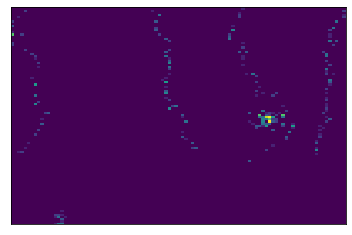

In [2]:
import matplotlib.pyplot as plt 
for i in range(2, 6):
    plt.hist2d(cens[i][0, :, 0], cens[i][0, :, 1], bins=100)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.bar(cens[i][0, :, 0], cens[i][0, :, 1], cens[i][0, :, 2])
    # plt.xlabel('Quantity of points', fontsize=14)
    # plt.ylabel('Number of templates', fontsize=14)
    plt.xticks([])
    plt.yticks([])
    # plt.title('Points in template point cloud of\n class Cyclist', fontsize=16, y=1.01)
    plt.savefig('Cyccenter/{}s.png'.format(i))
plt.show()
# 53 ped 
# 1 car 
# 12 van 
# 5 cyc

In [9]:
import numpy as np 
import mayavi.mlab as mlab
# mlab.figure(bgcolor=(1, 1, 1), fgcolor=(0, 0, 0))

for i in range(5):
    s = candidate_PCs_torchs[i][0].cpu()
    l = model_PC_torchs[i][0].cpu()
    # m = gtboxs[i].corners().transpose(1, 0)
    # c = acboxs[i].corners().transpose(1, 0)
    # d = closeboxs[i].corners().transpose(1, 0)
    # p = PCs[i].points.transpose(1, 0)
    # b = BBs[i].corners().transpose(1, 0)
    # r = results_BBs[i].corners().transpose(1, 0)
    # t = cens[i][0]
    # idxes = np.where(segs[i].sigmoid().cpu() > 0.5)[1]
    # idxcs = np.where(cs[i].cpu()  == 1)[0]
    # print(len(idxes), len(idxcs))
    mlab.figure(bgcolor=(1, 1, 1), fgcolor=(0, 0, 0))
#     # mlab.points3d(d[:, 0], d[:, 1], d[:, 2], colormap='spectral',scale_factor=.08)
#     # mlab.points3d(f[:, 0], f[:, 1], f[:, 2], colormap='spectral',scale_factor=.03)
    mlab.points3d(s[:, 0], s[:, 1], s[:, 2], colormap='spectral', scale_factor=.06)
    # mlab.points3d(l[:, 0], l[:, 1], l[:, 2], colormap='spectral', scale_factor=.06)
    # mlab.points3d(p[:, 0], p[:, 1], p[:, 2], colormap='spectral', scale_factor=.06)
    # mlab.points3d(t[:, 0], t[:, 1], t[:, 2], color=(0, 1, 0), colormap='spectral', scale_factor=.04)    
    # mlab.points3d(s[idxes, 0], s[idxes, 1], s[idxes, 2], color=(1, 0, 0), colormap='spectral', scale_factor=.1)
    # mlab.points3d(s[idxcs, 0], s[idxcs, 1], s[idxcs, 2], color=(0, 0, 0.8), colormap='spectral', scale_factor=.09) 
    # idx = np.array([0, 1, 2, 3, 0, 4, 5, 6, 7, 4, 5, 1, 2, 6, 7, 3])
    # mlab.plot3d(c[idx, 0], c[idx, 1], c[idx, 2], color=(1, 0, 1), colormap='spectral', representation='wireframe', line_width=1)
    # mlab.plot3d(m[idx, 0], m[idx, 1], m[idx, 2], color=(1, 1, 0), colormap='spectral', representation='wireframe', line_width=5)
    # mlab.plot3d(d[idx, 0], d[idx, 1], d[idx, 2], color=(0, 1, 0), colormap='spectral', representation='wireframe', line_width=1)
    # mlab.plot3d(b[idx, 0], b[idx, 1], b[idx, 2], color=(0, 1, 0), colormap='spectral', representation='wireframe', line_width=5)
    # mlab.plot3d(r[idx, 0], r[idx, 1], r[idx, 2], color=(1, 1, 0), colormap='spectral', representation='wireframe', line_width=5)
    # for j in range(64):
    #     p = pboxes[j].corners().transpose(1, 0)
    #     mlab.plot3d(p[idx, 0], p[idx, 1], p[idx, 2], color=(1, 0, 0), colormap='spectral', representation='wireframe', line_width=1)
    # mlab.view(35, 30, 15)
    # mlab.view(0, 0, 15)
    # mlab.view(90, 80, 13)
    mlab.view(135, 70, 15)  # van
    # mlab.view(-5, 85, 14)  # ped
# # mlab.points3d(s[idx, 0], s[idx, 1], s[idx, 2], color=(1, 0, 0), colormap='spectral', scale_factor=.06)
mlab.show()


In [51]:
import torch.utils.data
from Dataset import SiameseTrain, SiameseTest
from tqdm import tqdm 
import kitty_utils as utils
# train_data = SiameseTrain(
# 	input_size=1024,
# 	path='/mnt/ssd-data/RUNNING/data/training',
# 	split='Train',
# 	category_name='Car',
# 	offset_BB=0,
# 	scale_BB=1.25)

train_data = SiameseTest(
    input_size=1024,
    path='/mnt/ssd-data/RUNNING/data/training',
    split='Test',
    category_name='Van',
    offset_BB=0,
    scale_BB=1.25)
train_dataloader = torch.utils.data.DataLoader(
    train_data,
    collate_fn=lambda x: x,
    batch_size=1,
    shuffle=False,
    num_workers=0,
    pin_memory=True)
gtlen = []
dataset = train_dataloader.dataset
with tqdm(enumerate(train_dataloader)) as t:
    for batch in train_dataloader:
        for PCs, BBs, _ in batch:
            for i, _ in enumerate(PCs):
                model_PC = utils.getModel([PCs[i]], [BBs[i]], offset=dataset.offset_BB, scale=dataset.scale_BB)
                gtlen.append(model_PC.points.shape[1])  
    # gtlen.append(object_point_set.shape[2])

0it [00:02, ?it/s]


Text(0.5, 1.01, 'Points in template point cloud of\n class Cyclist')

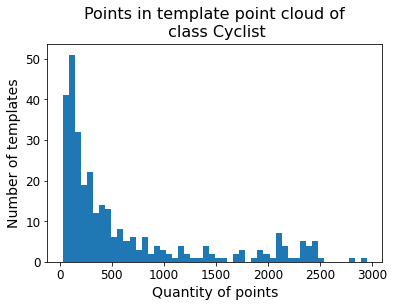

In [52]:
import matplotlib.pyplot as plt 
plt.hist(gtlen, bins=50, histtype='bar')
plt.xlabel('Quantity of points', fontsize=14)
plt.ylabel('Number of templates', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Points in template point cloud of\n class Cyclist', fontsize=16, y=1.01)